# Plots for Dussin et al., <br/>**Biogeochemical drivers of changing hypoxia in the California Current Ecosystem**., <br/>Deep Sea Research II, 2019

## Import python modules and define functions

In [1]:
# We need to manually set the path for PROJ_LIB
# you may need to change this according to your environment
import os
# RD laptop
#os.environ['PROJ_LIB'] = '/opt/anaconda2/5.1.0/envs/pubs/share/proj/'
# binder
os.environ['PROJ_LIB'] = '/srv/conda/envs/kernel/share/proj/'

In [2]:
# all these packages are standard python modules
import netCDF4 as nc
import numpy as np
import matplotlib.pylab as plt
import matplotlib.cm as cm
import matplotlib.colors as cl
import matplotlib.ticker as ticker
from mpl_toolkits.basemap import Basemap
from scipy import ndimage as im
from scipy import spatial
import seaborn as sns
import pandas as pd
from terminaltables import AsciiTable

In [3]:
# check python version, needs to be 2.7 for basemap to work
import sys
sys.version

'2.7.15 |Anaconda, Inc.| (default, Dec 14 2018, 13:10:39) \n[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]'

In [4]:
from Dussin_et_al_Hypoxia_Drivers_utils import *

## Data

All data is included in the subdirectory

In [5]:
datadir = './data_Dussin_Hypoxia_drivers/'

In [6]:
# set to True if you want to save figures to eps files
save_eps=False
# set to True if you want to save figures to png files
save_png=False

## Figure 1: perturbation profiles from ESM2M in DO and NO3

In [7]:
def plot_perturbation_profiles(datadir):
    
    file_profiles = datadir + 'delta_profiles.nc'
    unit_conv = 1035 * 22391.6 / 1000.0 # ml/L
    o2north = readnc(file_profiles, 'o2north') * unit_conv
    o2south = readnc(file_profiles, 'o2south') * unit_conv
    o2west = readnc(file_profiles, 'o2west') * unit_conv
    o2all = readnc(file_profiles, 'o2all') * unit_conv
    o2central = readnc(file_profiles, 'o2central') * unit_conv
    o2min = readnc(file_profiles, 'o2min') * unit_conv
    o2max = readnc(file_profiles, 'o2max') * unit_conv
    z= readnc(file_profiles, 'z')
    
    unit_conv = 1.0e+6
    no3north = readnc(file_profiles, 'no3north') * unit_conv
    no3south = readnc(file_profiles, 'no3south') * unit_conv
    no3west = readnc(file_profiles, 'no3west') * unit_conv
    no3all = readnc(file_profiles, 'no3all') * unit_conv
    no3central = readnc(file_profiles, 'no3central') * unit_conv
    no3min = readnc(file_profiles, 'no3min') * unit_conv
    no3max = readnc(file_profiles, 'no3max') * unit_conv
    
    fig = plt.figure(figsize=[24,12])
    plt.subplot(121)
    plt.plot(o2south, -z, 'r', o2north, -z, 'b',
             o2west, -z, 'g', o2all, -z, 'k', linewidth=2)
    plt.plot(o2min, -z, 'grey', o2max, -z, 'grey')
    plt.fill_betweenx(-z, o2min, o2max, color='grey', alpha=0.5)
    plt.legend(('$\Delta O_{2}$ south',
                '$\Delta O_{2}$ north',
                '$\Delta O_{2}$ west',
                '$\Delta O_{2}$ domain'), loc=3, fontsize=20)
    # set y axis in log and reverse
    plt.yscale('log')
    plt.ylim([10, 4000])
    plt.gca().invert_yaxis()
    plt.yticks([20,30,40,50,100,200,300,400,500,1000,2000,3000,4000],
               [20,30,40,50,100,200,300,400,500,1000,2000,3000,4000], 
               fontsize=20)
    plt.xticks(np.arange(-2,0+0.5,0.5), 
               np.arange(-2,0+0.5,0.5), fontsize=20)
    plt.ylabel('depth (m)', fontsize=20)
    plt.xlabel('$\Delta O_{2}$ (mL/L)', fontsize=20)
    plt.grid()
    
    plt.subplot(122)
    plt.plot(no3south, -z, 'r', no3north, -z, 'b',
             no3west, -z, 'g', no3all, -z, 'k', linewidth=2)
    plt.plot(no3min, -z, 'grey', no3max, -z, 'grey')
    plt.fill_betweenx(-z, no3min, no3max, color='grey', alpha=0.5)
    plt.legend(('$\Delta NO_{3}$ south',
                '$\Delta NO_{3}$ north',
                '$\Delta NO_{3}$ west',
                '$\Delta NO_{3}$ domain'), loc=4, fontsize=20)
    # set y axis in log and reverse
    plt.yscale('log')
    plt.ylim([10, 4000])
    plt.gca().invert_yaxis()
    plt.yticks([20,30,40,50,100,200,300,400,500,1000,2000,3000,4000],
               [20,30,40,50,100,200,300,400,500,1000,2000,3000,4000], 
               fontsize=20)
    plt.xticks(np.arange(-5,15+2.5,2.5), 
               np.arange(-5,15+2.5,2.5), fontsize=20)
    plt.xlabel('$\Delta NO_{3}$ ($\mu$mol/kg)', fontsize=20)
    plt.grid()
    
    if save_png:
        plt.savefig('figure1.png', bbox_inches='tight')
    if save_eps:
        plt.savefig('figure1.eps', bbox_inches='tight')

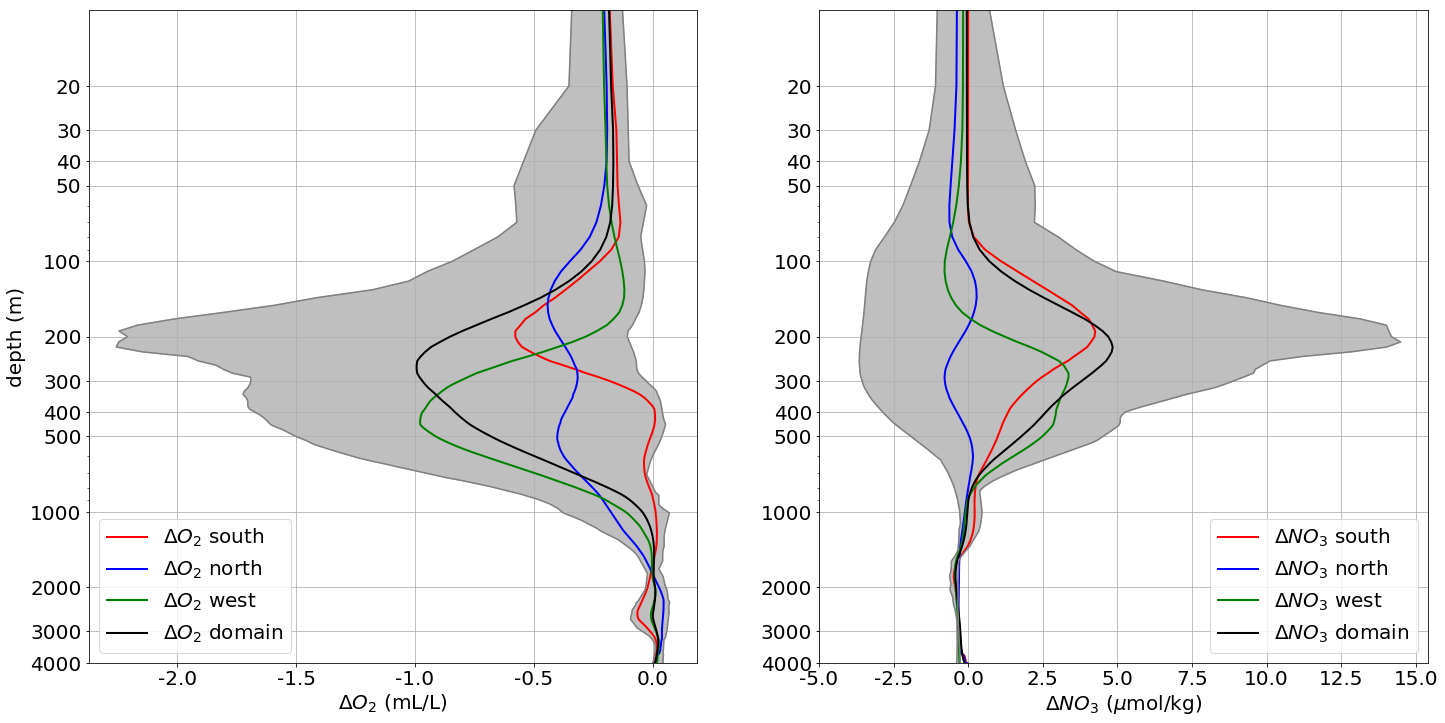

In [8]:
plot_perturbation_profiles(datadir)

## Figure 2: pertubations maps from ESM2M of DO and NO3

In [9]:
def make_perturbation_maps(datadir):
    ''' make plot for no3/o2 perturbations'''
    file_slices_200m = datadir + 'deltas_200meters.nc'
    
    lon = readnc(file_slices_200m, 'lon')
    lat = readnc(file_slices_200m, 'lat')
    delta_o2_200  = readnc(file_slices_200m, 'diff_o2_200')
    delta_no3_200 = readnc(file_slices_200m, 'diff_no3_200')
    delta_o2_100  = readnc(file_slices_200m, 'diff_o2_100')
    delta_no3_100 = readnc(file_slices_200m, 'diff_no3_100')
    
    delta_O2_200 = delta_o2_200 * 1035 * 22391.6 / 1000.0 # ml/L
    delta_NO3_200 = delta_no3_200 * 1e+6 # umol/kg
    
    delta_O2_100 = delta_o2_100 * 1035 * 22391.6 / 1000.0 # ml/L
    delta_NO3_100 = delta_no3_100 * 1e+6 # umol/kg
    
    contours_no3 = np.arange(-5, 15.+1, 1)
    contours_o2 = np.arange(-3, 0.1, 0.1)
    
    norm_no3 = cl.Normalize(vmin=-5, vmax=15)
    norm_o2 = cl.Normalize(vmin=-2.5, vmax=0)
    
    ticks_no3 = np.arange(-5,15+5,5)
    ticks_o2 = np.arange(-3,1,1)
    
    pal_no3 = cm.brg
    pal_o2 = cm.brg_r
    
    cbarfmt = '%1f'
    
    # start figure
    fig = plt.figure(figsize=[24.,12.])
    # NO3
    ax  = fig.add_subplot(122)
    m = setup_map_small(datadir, hide_grid=False)
    C = m.contourf(lon, lat, delta_NO3_200, contours_no3, 
                   cmap=pal_no3, norm=norm_no3)
    cbar = plt.colorbar(C, format=cbarfmt, shrink=0.7, 
                        ticks=ticks_no3)
    cbar.ax.set_yticklabels(ticks_no3, fontsize=20)

    conts = m.contour(lon, lat, delta_NO3_100, [0,1,2,3], 
                      colors='k')
    plt.clabel(conts, inline=1, fontsize=20, fmt='%2i')
    
    # O2
    ax  = fig.add_subplot(121)
    m = setup_map_small(datadir, hide_grid=False)
    C = m.contourf(lon, lat, delta_O2_200, contours_o2, 
                   cmap=pal_o2, norm=norm_o2)
    cbar = plt.colorbar(C, format=cbarfmt, shrink=0.7, 
                        ticks=ticks_o2)
    cbar.ax.set_yticklabels(ticks_o2, fontsize=20)
    
    conts = m.contour(lon, lat, delta_O2_100, 
                      [-0.75,-0.5,-0.25,-0.1], 
                      colors='k')
    plt.clabel(conts, inline=1, fontsize=20, fmt='%.2f')
    
    if save_png:
        plt.savefig('figure2.png', bbox_inches='tight')
    if save_eps:    
        plt.savefig('figure2.eps', bbox_inches='tight')

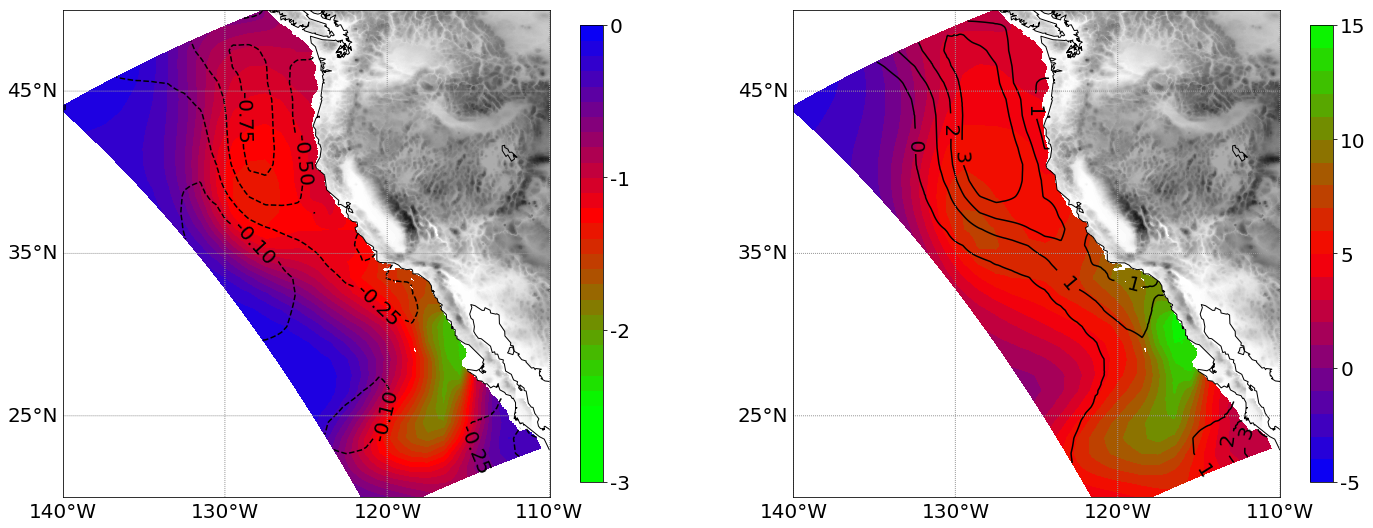

In [10]:
make_perturbation_maps(datadir)

## Figure 3: SST and [Chl] in REF, ESM2M vs NOAA OISST and SeaWIFS

In [11]:
def make_plot_cross_shore_chl_sst(datadir):
    ''' make validation plot on SST/Chl '''

    # Files needed
    gridfile = 'CCS1_grid.nc'
    file_sst_2d_REF = 'sst_CCS1-RD.NVOcobalt31S_1996-2006-JJA_season.nc'
    file_chl_2d_REF = 'surf_chl_CCS1-RD.NVOcobalt31S_1996-2006-JJA_season.nc'
    
    file_sst_prof_REF = 'sst_alongshore_mean_CCS1-RD.NVOcobalt31S_JJA_1996-2006.nc'
    file_sst_prof_ESM2M = 'sst_alongshore_mean_ESM2M_JJA_1996-2006.nc'
    file_sst_prof_OISST = 'sst_alongshore_mean_NOAA_OIv2_JJA_1996-2006.nc'
    
    file_chl_prof_REF = 'surf_chl_alongshore_mean_CCS1-RD.NVOcobalt31S_JJA_1996-2006.nc'
    file_chl_prof_ESM2M = 'surf_chl_alongshore_mean_ESM2M_JJA_1996-2006.nc'
    file_chl_prof_seawifs = 'surf_chl_alongshore_mean_Seawifs_JJA_1996-2006.nc'
    
    # Read data
    lon = readnc(datadir + gridfile, 'lon')
    lat = readnc(datadir + gridfile, 'lat')

    map_sst = readnc(datadir + file_sst_2d_REF, 'temp')
    map_chl_surf = readnc(datadir + file_chl_2d_REF, 'chl') 
    #--- units change: [ug/kg] * [kg/m3] / [ug/mg] = [mg/m3]
    map_chl_surf = map_chl_surf * 1035 / 1000.
    
    cross_shore_dist = readnc(datadir + file_sst_prof_REF, 
                              'cross_shore_dist')
    sst_ref = readnc(datadir + file_sst_prof_REF, 'sst')
    sst_esm2m = readnc(datadir + file_sst_prof_ESM2M, 'sst')
    sst_obs = readnc(datadir + file_sst_prof_OISST, 'sst')

    surf_chl_ref = readnc(datadir + file_chl_prof_REF, 'surf_chl')
    surf_chl_esm2m = readnc(datadir + file_chl_prof_ESM2M, 'surf_chl')
    surf_chl_obs = readnc(datadir + file_chl_prof_seawifs, 'surf_chl')

    # figure options
    sns.set_style("whitegrid", {
    "font.family": "serif",
    "font.serif": ["Times", "Palatino", "serif"],
    'fontsize':'large'
    })
    my_colors = define_colors()
    
    # begin figure
    fig = plt.figure(figsize=[20.,10.])
    ax0 = plt.subplot2grid((10, 20), (0, 0), 
                           colspan=10, rowspan=10)
    m = setup_map_small(datadir)
    contours = np.arange(-1.4, 1, 0.05)
    cticks = [0.01, 0.05, 0.1, 0.5, 1., 2., 3., 5., 7.]
    ticks = np.log10(cticks)
    norm= cl.Normalize(vmin=-1.4, vmax=2)
    m.contourf(lon, lat, np.log10(map_chl_surf), 
               contours, cmap=cm.CMRmap, 
               norm=norm, extend='both')
    cbar0 = m.colorbar(ticks=ticks)
    cbar0.ax.set_yticklabels(cticks, fontsize=16)
    conts = m.contour(lon[:,10:], lat[:,10:], 
                      map_sst[:,10:], [14., 16.,18.,20.,22.,24.], 
                      colors='w')
    manual_locations = [(360-124, 41), (360-130, 45), 
                        (360-130, 40), (360-120, 31), 
                        (360-120, 28), (360-120, 24)]
    plt.clabel(conts, inline=1, fontsize=18, fmt='%2i', 
               manual=manual_locations)

    # central CCS
    m.plot(lon[220,:135],lat[220,:135],'w--')
    m.plot(lon[380,:155],lat[380,:155],'w--')

    ax1 = plt.subplot2grid((10, 20), (1, 12), colspan=8, rowspan=8)
    ax1.plot(-cross_shore_dist, surf_chl_ref, 
             color=my_colors['my_red'], linewidth=2, label='[Chl] REF')
    ax1.plot(-cross_shore_dist, surf_chl_esm2m, 
             color=my_colors['my_blue'], linewidth=2, label='[Chl] ESM2M')
    ax1.plot(-cross_shore_dist, surf_chl_obs, 
             color='k', linewidth=2, label='[Chl] SeaWIFS')
    ax1.set_ylabel('[Chl] $(mg.m^{-3})$', color='k', fontsize=20)
    for tl in ax1.get_yticklabels():
        tl.set_color('k')

    plt.xlim([-800,0])
    plt.ylim([0,2.5])
    plt.yticks(np.arange(0,2.5+0.5,0.5), 
               np.arange(0,2.5+0.5,0.5), fontsize=20)
    plt.legend(loc=(0.025,0.22,), fontsize=18, frameon=True)
    
    ax2 = ax1.twinx()
    ax2.plot(-cross_shore_dist, sst_ref, color=my_colors['my_red'], 
             linestyle='--', linewidth=2, label='SST REF')
    ax2.plot(-cross_shore_dist, sst_esm2m, color=my_colors['my_blue'], 
             linestyle='--', linewidth=2, label='SST ESM2M')
    ax2.plot(-cross_shore_dist, sst_obs, color='k', linestyle='-.', 
             linewidth=2, label='SST NOAA OIv2')
    ax2.set_ylabel('SST $(^{\circ} C)$', color='k', fontsize=20)
    for tl in ax2.get_yticklabels():
        tl.set_color('k')

    ax1.set_xticklabels(np.arange(-800,200,200), 
                        fontdict={'fontsize':18})
    ax1.set_xlabel('distance to shore (km)', fontsize=20)
    plt.legend(loc=(0.025,0.42,),fontsize=18,frameon=True)
    plt.ylim([10,20])
    plt.yticks(np.arange(10,20+2,2), np.arange(10,20+2,2), fontsize=20)
    plt.xticks(np.arange(-800,0+200,200), 
               np.arange(-800,0+200,200), fontsize=20)
    plt.grid()

    if save_png:
        plt.savefig('figure3.png',bbox_inches='tight')
    if save_eps:
        plt.savefig('figure3.eps',bbox_inches='tight')

/opt/anaconda2/5.1.0/envs/pubs/lib/python2.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in log10


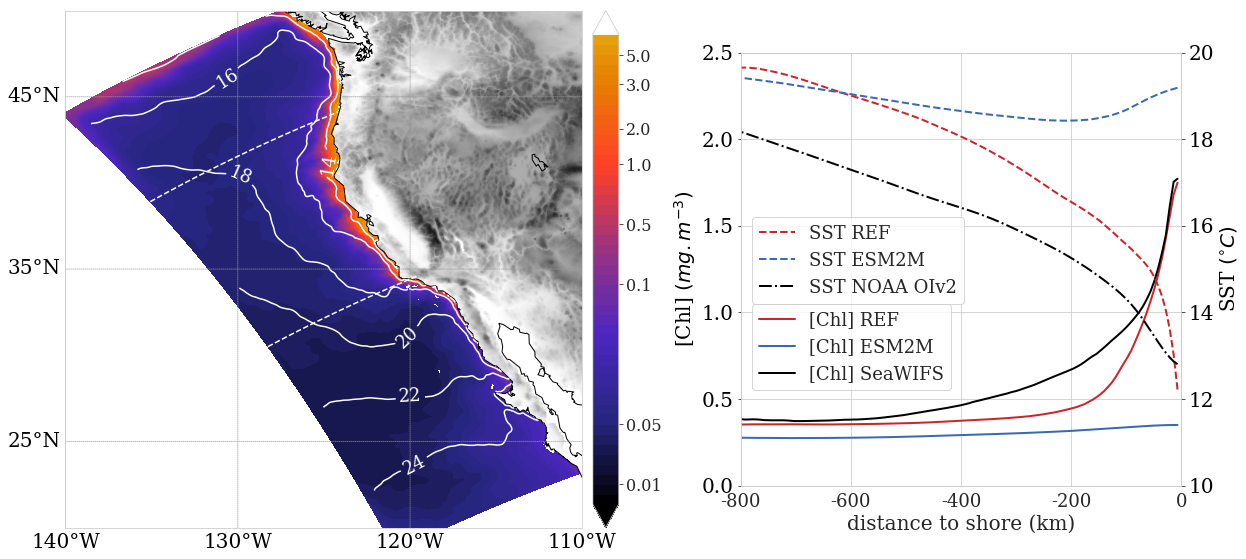

In [12]:
make_plot_cross_shore_chl_sst(datadir)

## Figure 4: Comparison of hypoxic boundary in REF and WOA13

In [13]:
def make_plot_hypoxic_bdry_map(datadir):
    ''' make validation plot on hypoxic boundary '''
    # get colormap from file
    rt_colormaps = rt_getcolormaps()
    pal = rt_colormaps['pastel1']
    # colorbar options
    cbarfmt = "%01g"
    norm = cl.Normalize(vmin=-600, vmax=0)
    contours=np.arange(-600.,-90.+10.,10.)
    ticks=np.arange(-600,-100+100,100)
    # layout options
    sns.set(font_scale=1.4)
    sns.set_style("darkgrid", {
    "font.family": "serif",
    "font.serif": ["Times", "Palatino", "serif"],
    'grid.linestyle': '-'
    })

    # read data
    file_REF = 'CCS1-RD.NVOcobalt31S_hypoxic_bdry_annual_1996-2006.nc'
    file_WOA = 'WOA13_hypoxic_bdry_annual_clim.nc'
    lon = readnc(datadir + file_REF, 'lon') 
    lat = readnc(datadir + file_REF, 'lat')
    hyp_bd_REF = readnc(datadir + file_REF, 'hypoxic_boundary')
    hyp_bd_WOA = readnc(datadir + file_WOA, 'hypoxic_boundary')
    # mask special values
    hyp_bd_REF = np.ma.masked_values(hyp_bd_REF,-9999.)
    hyp_bd_WOA = np.ma.masked_values(hyp_bd_WOA,-9999.)
    
    # start figure
    fig = plt.figure(figsize=[24.,12.])
    # model
    ax  = fig.add_subplot(121)
    m = setup_map_small(datadir, hide_grid=False)
    C = m.contourf(lon, lat, hyp_bd_REF, contours, cmap=pal, norm=norm)
    cbar = plt.colorbar(C, format=cbarfmt, shrink=0.7, ticks=ticks)
    cbar.ax.set_yticklabels(ticks, fontsize=20)
    # add central CCS band
    m.plot(lon[220,:135],lat[220,:135],'k--')
    m.plot(lon[380,:155],lat[380,:155],'k--')

    # WOA
    ax  = fig.add_subplot(122)
    m = setup_map_small(datadir, hide_grid=False)
    C = m.contourf(lon, lat, hyp_bd_WOA, contours, cmap=pal, norm=norm)
    cbar = plt.colorbar(C, format=cbarfmt, shrink=0.7, ticks=ticks)
    cbar.ax.set_yticklabels(ticks, fontsize=20)
    # add central CCS bands
    m.plot(lon[220,:135],lat[220,:135],'k--')
    m.plot(lon[380,:155],lat[380,:155],'k--')

    if save_png:
        plt.savefig('figure4.png',bbox_inches='tight')
    if save_eps:
        plt.savefig('figure4.eps',bbox_inches='tight')

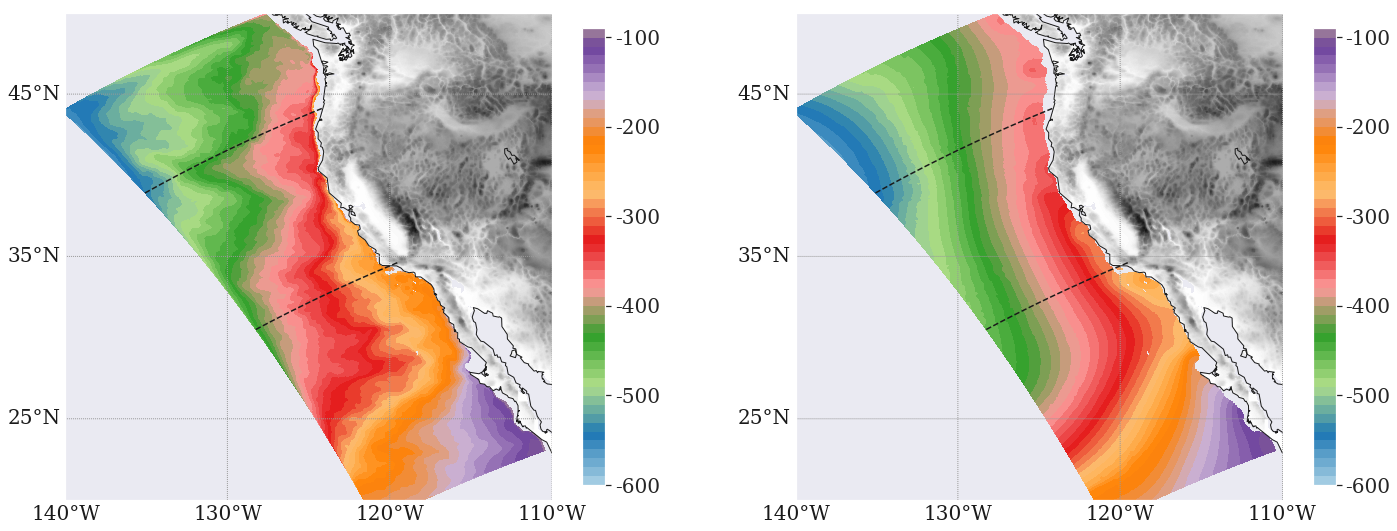

In [14]:
make_plot_hypoxic_bdry_map(datadir)

## Figure 5: Validation of bottom DO

In [15]:
def make_plot_DO_vs_NOAA(datadir):
    ''' make plot of DO vs NOAA data '''
    datadir_csv = datadir + '/csv/'
    # read the reference run data from easy_coloc csv files
    data_runref = pd.DataFrame(columns=['lon', 'lat', 'depth', 'O2', 'month'])
    data_obs    = pd.DataFrame(columns=['lon', 'lat', 'depth', 'O2', 'month'])

    # read the model 1996-2006 avg
    for month in ['june', 'july', 'aug']:
        tmp = pd.read_csv(datadir_csv + 'roms_run31S_onto_o2noaa_' + \
                          month + '_1996-2006.txt',
                          header=None, names=['lon','lat','depth','O2'])
        tmp['month'] = month
        data_runref = pd.concat([data_runref,tmp], ignore_index=True)

    # read the DO data from observation
    for month in ['june','july','aug']:
        tmp = pd.read_csv(datadir_csv + 'oxygen_o2noaa_' + month + '.txt', 
                          header=None, names=['lon', 'lat', 'depth', 'O2'])
        tmp['month'] = month
        data_obs = pd.concat([data_obs,tmp], ignore_index=True)

    # mask and set depth from bottom to top
    spval=1.0e+15
    dataplt_runref = np.ma.masked_values(data_runref['O2'].values, spval)
    dataplt_obs    = np.ma.masked_values(data_obs['O2'].values, spval)

    depth_runref = -1*np.ma.masked_values(data_runref['depth'].values, spval)
    depth_obs    = -1*np.ma.masked_values(data_obs['depth'].values, spval)

    depths=np.arange(0, 1200+5, 5)

    sns.set_style('darkgrid', {'legend.frameon':True})
    my_colors = define_colors()

    plt.figure(figsize=[10.,8.])
    
    # obs
    plt.scatter(dataplt_obs, depth_obs, c=my_colors['my_red'], 
                alpha=0.99, marker='o',
                label='Obs', edgecolors=None)
    # model
    plt.scatter(dataplt_runref, depth_runref, c=my_colors['my_blue'], 
                alpha=0.3, marker='o',
                label='REF', edgecolors=None)
    # hypoxia threshold
    plt.plot(1.43*np.ones(depths.shape), -depths,'k--', linewidth=2)
    ax = plt.gca()

    legend = plt.legend(loc=[0.8,0.68], fontsize=18)
    frame = legend.get_frame()
    frame.set_facecolor('white')

    plt.title('')
    plt.xlim([0.,6.])
    plt.ylim([-1200,0])
    plt.xticks(np.arange(0,6+1), np.arange(0,6+1), fontsize=20)
    plt.yticks(np.arange(-1200,200,200), 
               np.arange(-1200,200,200), fontsize=20)

    plt.xlabel('DO (mL/L)',fontsize=20)
    plt.ylabel('depth (m)',fontsize=20)
    
    # add white patch for map insert
    fp = ax.add_patch(plt.Polygon([[2.1,-1175],[5.9,-1175],
                                   [5.9,-425],[2.1,-425] ], closed=True, 
                                  fill=True,color='white'))

    # insert map
    ax_insert = plt.axes([0.46, 0.18, 0.42, 0.42])

    m = setup_map_small(datadir, plt_topo=True, 
                        hide_grid=False)

    lon = readnc(datadir + 'CCS1_grid.nc','lon')
    lat = readnc(datadir + 'CCS1_grid.nc','lat')

    #add patch for obs location
    obs_lon = data_obs['lon'].values + 360
    obs_lat = data_obs['lat'].values
    isobs = np.ones(obs_lon.shape)

    lon_patch = np.arange(220, 250, 0.25)
    lat_patch = np.arange(20, 50, 0.25)
    H, xedges, yedges = np.histogram2d(obs_lat, obs_lon, 
                                       bins=[lat_patch, lon_patch])

    mask_obs = np.zeros(H.shape)
    mask_obs[np.where(H > 0)] = 1
    lon_patchplt, lat_patchplt = np.meshgrid(lon_patch[:-1],
                                             lat_patch[:-1])

    fig_temp = plt.figure()
    m =setup_map_small(datadir)
    cont = m.contour(lon_patchplt, lat_patchplt, 
                     mask_obs,[0.99,1.01])
    plt.close(fig_temp)
    
    for cont_tmp in cont.allsegs[0]:
        fp = ax_insert.add_patch(plt.Polygon(cont_tmp, closed=True, 
                                             fill=False, hatch='/////',
                                             color='k', linewidth=1))
    if save_png:
        plt.savefig('figure5.png', bbox_inches='tight')
    if save_eps:
        plt.savefig('figure5.eps', bbox_inches='tight')

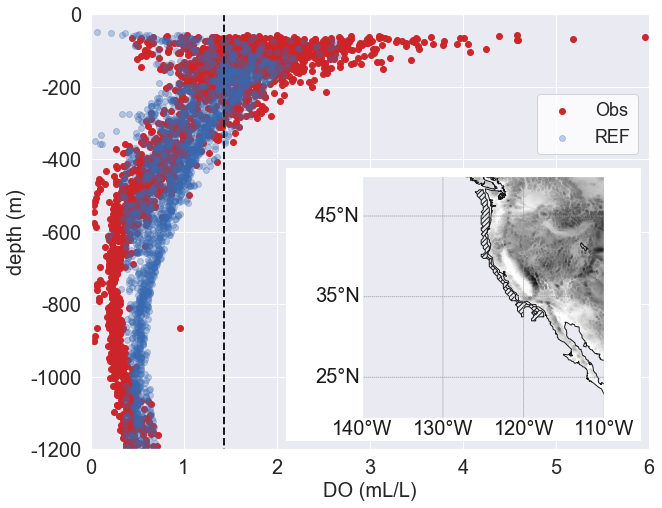

In [16]:
make_plot_DO_vs_NOAA(datadir)

## Figure 6: NPP in REF and perturbations

In [17]:
def plot_npp_map(datadir):

    # data for map plot
    lon = readnc(datadir + 'CCS1_grid.nc','lon')
    lat = readnc(datadir + 'CCS1_grid.nc','lat')

    R31S = readnc(datadir + 'npp100_CCS1-RD.NVOcobalt31S_JJA_1996-2006.nc','npp_100')
    R32R = readnc(datadir + 'npp100_CCS1-RD.FCcobalt32R_JJA_1996-2006.nc','npp_100')
    R33O = readnc(datadir + 'npp100_CCS1-RD.FCcobalt33O_JJA_1996-2006.nc','npp_100')
    R34N = readnc(datadir + 'npp100_CCS1-RD.FCcobalt34N_JJA_1996-2006.nc','npp_100')
    R35W = readnc(datadir + 'npp100_CCS1-RD.FCcobalt35W_JJA_1996-2006.nc','npp_100')

    R31S = convert2ma(R31S)
    R32R = convert2ma(R32R)
    R33O = convert2ma(R33O)
    R34N = convert2ma(R34N)
    R35W = convert2ma(R35W)
    
    norm1= cl.Normalize(vmin=0, vmax=2400)
    norm2= cl.Normalize(vmin=-500, vmax=500)

    contours1=np.arange(0, 2400+50, 50)
    contours2=np.arange(-500, 500+10, 10)
    diffticks=[-500,0,500]

    cmap1=cm.jet
    cmap2=cm.bwr

    sns.set_style('whitegrid')
    
    plt.figure(figsize=[18,8])
    plt.subplot(151)
    map1 = setup_map_verysmall(datadir)
    map1.contourf(lon, lat, R31S, contours1, norm=norm1, 
                  cmap=cmap1, extend='both')
    cb = plt.colorbar(orientation='horizontal', shrink=0.99, 
                      ticks=[0,1200,2400])
    cb.ax.tick_params(labelsize=16)
    plt.annotate('REF', xy=(0.04, 0.92), xycoords='axes fraction', 
                 fontsize=18, color='w')

    plt.subplot(152)
    map2 = setup_map_verysmall(datadir, hide_grid=True)
    map2.contourf(lon, lat, R32R-R31S, contours2, norm=norm2, 
                  cmap=cmap2, extend='both')
    cb = plt.colorbar(orientation='horizontal', shrink=0.99, 
                      ticks=diffticks)
    cb.ax.tick_params(labelsize=16)
    map2.contour(lon, lat, R32R-R31S, [250], colors='k')
    plt.annotate('O-N+', xy=(0.04, 0.92), xycoords='axes fraction', 
                 fontsize=18, color='k')
    
    plt.subplot(153)
    map3 = setup_map_verysmall(datadir, hide_grid=True)
    map3.contourf(lon, lat, R33O-R31S, contours2, norm=norm2, 
                  cmap=cmap2, extend='both')
    cb = plt.colorbar(orientation='horizontal', shrink=0.99, 
                      ticks=diffticks)
    cb.ax.tick_params(labelsize=16)
    map3.contour(lon, lat, R33O-R31S, [250], colors='k')
    plt.annotate('O-', xy=(0.04, 0.92), xycoords='axes fraction', 
                 fontsize=18, color='k')
    
    plt.subplot(154)
    map4 = setup_map_verysmall(datadir, hide_grid=True)
    map4.contourf(lon, lat, R34N-R31S, contours2, norm=norm2, 
                  cmap=cmap2, extend='both')
    cb = plt.colorbar(orientation='horizontal', shrink=0.99, 
                      ticks=diffticks)
    cb.ax.tick_params(labelsize=16)
    map4.contour(lon, lat, R34N-R31S, [250], colors='k')
    plt.annotate('N+', xy=(0.04, 0.92), xycoords='axes fraction', 
                 fontsize=18, color='k')
    
    plt.subplot(155)
    map5 = setup_map_verysmall(datadir, hide_grid=True)
    map5.contourf(lon, lat, R35W-R31S, contours2, norm=norm2, 
                  cmap=cmap2, extend='both')
    cb = plt.colorbar(orientation='horizontal', shrink=0.99, 
                      ticks=diffticks)
    cb.ax.tick_params(labelsize=16)
    map5.contour(lon, lat, R35W-R31S, [250], colors='k')
    plt.annotate('W+', xy=(0.04, 0.92), xycoords='axes fraction', 
                 fontsize=18, color='k')
    
    if save_png:
        plt.savefig('figure6.png', bbox_inches='tight')
    if save_eps:
        plt.savefig('figure6.eps', bbox_inches='tight')

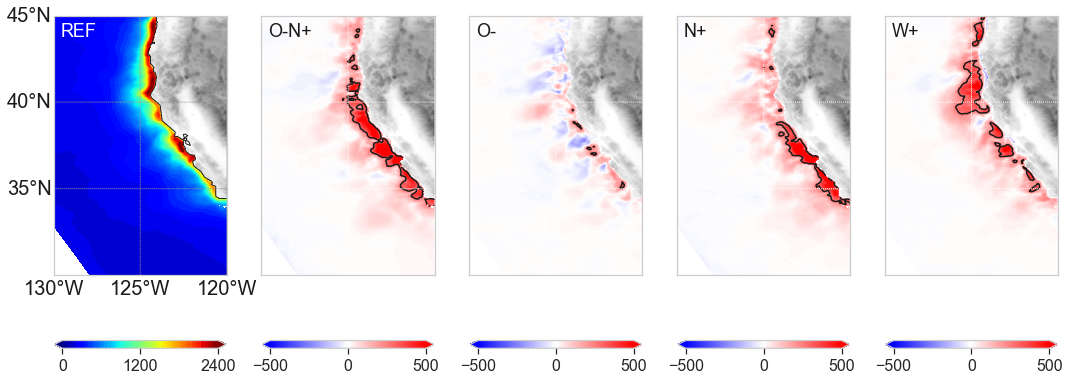

In [18]:
plot_npp_map(datadir)

## Figure 7: NPP and Export flux difference to REF

In [19]:
def plot_sensitivity_npp_ef(datadir):
    ''' make plot of NPP/EF difference to REF cross shore profile '''
    
    # data
    season = 'JJA' ; period = '1996-2006'
    cnpp = 'npp100_alongshore_mean_34.5-44'
    cef = 'exportflux100m_alongshore_mean_34.5-44'
    file_npp_ref    = '{}_CCS1-RD.NVOcobalt31S_{}_{}.nc'.format(cnpp, 
                                                                season, 
                                                                period)
    file_npp_pertON = '{}_CCS1-RD.FCcobalt32R_{}_{}.nc'.format(cnpp, 
                                                                season, 
                                                                period)
    file_npp_pertO  = '{}_CCS1-RD.FCcobalt33O_{}_{}.nc'.format(cnpp, 
                                                                season, 
                                                                period)
    file_npp_pertN  = '{}_CCS1-RD.FCcobalt34N_{}_{}.nc'.format(cnpp, 
                                                                season, 
                                                                period)
    file_npp_pertW  = '{}_CCS1-RD.FCcobalt35W_{}_{}.nc'.format(cnpp, 
                                                                season, 
                                                                period)
    
    file_ef_ref    = '{}_CCS1-RD.NVOcobalt31S_{}_{}.nc'.format(cef, 
                                                                season, 
                                                                period)
    file_ef_pertON = '{}_CCS1-RD.FCcobalt32R_{}_{}.nc'.format(cef, 
                                                                season, 
                                                                period)
    file_ef_pertO  = '{}_CCS1-RD.FCcobalt33O_{}_{}.nc'.format(cef, 
                                                                season, 
                                                                period)
    file_ef_pertN  = '{}_CCS1-RD.FCcobalt34N_{}_{}.nc'.format(cef, 
                                                                season, 
                                                                period)
    file_ef_pertW  = '{}_CCS1-RD.FCcobalt35W_{}_{}.nc'.format(cef, 
                                                                season, 
                                                                period)
    
    cross_shore_dist= readnc(datadir + file_npp_ref, 'cross_shore_dist')
    nppcross_ref    = readnc(datadir + file_npp_ref, 'npp100')
    nppcross_pertON = readnc(datadir + file_npp_pertON, 'npp100')
    nppcross_pertO  = readnc(datadir + file_npp_pertO, 'npp100')
    nppcross_pertN  = readnc(datadir + file_npp_pertN, 'npp100')
    nppcross_pertW  = readnc(datadir + file_npp_pertW, 'npp100')

    efcross_ref    = readnc(datadir + file_ef_ref, 'exportflux100m')
    efcross_pertON = readnc(datadir + file_ef_pertON, 'exportflux100m')
    efcross_pertO  = readnc(datadir + file_ef_pertO, 'exportflux100m')
    efcross_pertN  = readnc(datadir + file_ef_pertN, 'exportflux100m')
    efcross_pertW  = readnc(datadir + file_ef_pertW, 'exportflux100m')

    # convert units from mmol/m2/day to mgC/m2/day
    efcross_ref    = efcross_ref    * 6.625 * 12
    efcross_pertON = efcross_pertON * 6.625 * 12
    efcross_pertO  = efcross_pertO  * 6.625 * 12
    efcross_pertN  = efcross_pertN  * 6.625 * 12
    efcross_pertW  = efcross_pertW  * 6.625 * 12
        
    diff_nppcross_pertON = nppcross_pertON - nppcross_ref
    diff_nppcross_pertO  = nppcross_pertO  - nppcross_ref
    diff_nppcross_pertN  = nppcross_pertN  - nppcross_ref
    diff_nppcross_pertW  = nppcross_pertW  - nppcross_ref

    diff_efcross_pertON = efcross_pertON - efcross_ref
    diff_efcross_pertO  = efcross_pertO  - efcross_ref
    diff_efcross_pertN  = efcross_pertN  - efcross_ref
    diff_efcross_pertW  = efcross_pertW  - efcross_ref
        
    # standard colors for plots
    my_colors = define_colors()
    color_ref    = my_colors['my_violet']
    color_pertON = my_colors['my_red_bar']
    color_pertO  =  my_colors['my_blue_bar']
    color_pertN  =  my_colors['my_green_bar']
    color_pertW  =  my_colors['my_orange_bar']

    plt.figure(figsize=[8,8])

    ax1 = plt.subplot(111)
    ax1.plot(-cross_shore_dist, diff_nppcross_pertON, 
             color=color_pertON, linewidth=3, label='NPP O-N+')
    ax1.plot(-cross_shore_dist, diff_nppcross_pertO,
             color=color_pertO, linewidth=3, label='NPP O-')
    ax1.plot(-cross_shore_dist, diff_nppcross_pertN,
             color=color_pertN, linewidth=3, label='NPP N+')
    ax1.plot(-cross_shore_dist, diff_nppcross_pertW,
             color=color_pertW, linewidth=3, label='NPP W+')
    ax1.legend(loc=2,frameon=True,fontsize=18)
    plt.ylabel('NPP difference to REF $(mgC.m^{-2}.day^{-1})$',
               fontsize=20)
    plt.xlabel('distance to coast (km)', fontsize=20)
    plt.xticks(np.arange(-300,50,50), fontsize=18)
    plt.xlim([-300, 0])
    plt.ylim([-50, 400])
    plt.yticks(np.arange(-50, 400+50, 50),
               fontsize=18)
    plt.grid()
    ax2 = ax1.twinx()
    ax2.plot(-cross_shore_dist, diff_efcross_pertON,
             color=color_pertON, linewidth=3,
             label='Exp Fl O-N+', linestyle='dashed')
    ax2.plot(-cross_shore_dist, diff_efcross_pertO,
             color=color_pertO, linewidth=3,
             label='Exp Fl O-', linestyle='dashed')
    ax2.plot(-cross_shore_dist, diff_efcross_pertN,
             color=color_pertN, linewidth=3,
             label='Exp Fl N+', linestyle='dashed')
    ax2.plot(-cross_shore_dist, diff_efcross_pertW,
             color=color_pertW, linewidth=3,
             label='Exp Fl W+', linestyle='dashed')
    ax2.legend(loc=(0.025,0.50,), frameon=True, fontsize=18)
    plt.ylabel('Export Flux difference to REF $(mgC.m^{-2}.day^{-1})$',
               fontsize=20)
    plt.ylim([-15, 120])
    plt.yticks(np.arange(-15, 120+15, 15),
               fontsize=18)
    plt.xlim([-300,0])
        
    plt.tight_layout()

    if save_png:
        plt.savefig('figure7.png', bbox_inches='tight')
    if save_eps:
        plt.savefig('figure7.eps', bbox_inches='tight')

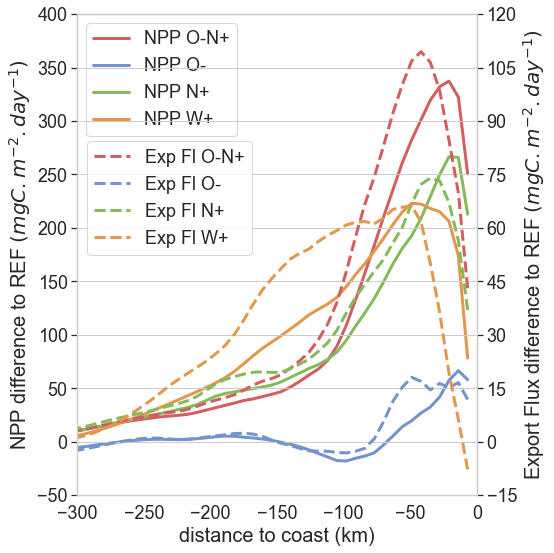

In [20]:
plot_sensitivity_npp_ef(datadir)

## Figure 8: Shoaling of the hypoxic boundary

In [21]:
def make_plot_shoaling_hypoxic_bdry_map(datadir):
    ''' shoaling of the hypoxic boundary in perturbation experiments'''
    rt_colormaps = rt_getcolormaps()
    pal = rt_colormaps['capet']
    cbarfmt = "%01g"
    norm = cl.Normalize(vmin=-10, vmax=130)
    contours=np.arange(0,130+5,5)
    ticks=np.arange(0,130+10,10)

    # data files needed
    cbin = 'binned_hypoxic_bdry_coastal500kmannual_1996-2006.nc'
    cbin2 = 'binned_hypoxic_bdry_Tpert_coastal500kmannual_1996-2006.nc'
    file_diff_2d_pertON       = 'compare_hypoxic_bdry_CCS1-RD.FCcobalt32R' + \
                                '-CCS1-RD.NVOcobalt31S_annual_1996-2006.nc'
    file_hypbdry_bins_ref     = 'CCS1-RD.NVOcobalt31S_' + cbin
    file_hypbdry_bins_pertON  = 'CCS1-RD.FCcobalt32R_' + cbin
    file_hypbdry_bins_pertO   = 'CCS1-RD.FCcobalt33O_' + cbin
    file_hypbdry_bins_pertN   = 'CCS1-RD.FCcobalt34N_' + cbin
    file_hypbdry_bins_pertW   = 'CCS1-RD.FCcobalt35W_' + cbin
    file_hypbdry_bins_pertSOL = 'CCS1-RD.NVOcobalt31S_' + cbin2
    file_hypbdry_bins_pertWO  = 'CCS1-RD.FCcobalt37WO_' + cbin
    file_hypbdry_bins_pertWON = 'CCS1-RD.FCcobalt38WON_' + cbin
    file_hypbdry_bins_pertHD  = 'CCS1-RD.FCcobalt39HD_' + cbin
    
    # grid
    lon = readnc(datadir + 'CCS1_grid.nc', 'lon')
    lat = readnc(datadir + 'CCS1_grid.nc', 'lat')
    dist500km = readnc(datadir + 'dist500km.nc', 'dist500km')
    
    # data for map
    hyp_bd_diff = readnc(datadir + file_diff_2d_pertON, 'hypoxic_boundary_diff')
    
    # data for line plot
    lat_bins = readnc(datadir + file_hypbdry_bins_ref, 'lat')
    hb_ref   = readnc(datadir + file_hypbdry_bins_ref, 'hypoxic_boundary')
    hb_32R   = readnc(datadir + file_hypbdry_bins_pertON, 'hypoxic_boundary')
    hb_33O   = readnc(datadir + file_hypbdry_bins_pertO, 'hypoxic_boundary')
    hb_34N   = readnc(datadir + file_hypbdry_bins_pertN, 'hypoxic_boundary')
    hb_35W   = readnc(datadir + file_hypbdry_bins_pertW, 'hypoxic_boundary')
    hb_sol   = readnc(datadir + file_hypbdry_bins_pertSOL, 'hypoxic_boundary')
    hb_37WO  = readnc(datadir + file_hypbdry_bins_pertWO, 'hypoxic_boundary')
    hb_38WON = readnc(datadir + file_hypbdry_bins_pertWON, 'hypoxic_boundary')
    hb_39HD  = readnc(datadir + file_hypbdry_bins_pertHD, 'hypoxic_boundary')

    hb_ref[np.where( np.isnan(hb_ref) )] = 0.
    hb_32R[np.where( np.isnan(hb_32R) )] = 0.
    hb_33O[np.where( np.isnan(hb_33O) )] = 0.
    hb_34N[np.where( np.isnan(hb_34N) )] = 0.
    hb_35W[np.where( np.isnan(hb_35W) )] = 0.
    hb_sol[np.where( np.isnan(hb_sol) )] = 0.
    hb_37WO[np.where( np.isnan(hb_37WO) )] = 0.
    hb_38WON[np.where( np.isnan(hb_38WON) )] = 0.
    hb_39HD[np.where( np.isnan(hb_39HD) )] = 0.
    
    hb_ref = np.ma.masked_values(hb_ref,0.)
    hb_32R = np.ma.masked_values(hb_32R,0.)
    hb_33O = np.ma.masked_values(hb_33O,0.)
    hb_34N = np.ma.masked_values(hb_34N,0.)
    hb_35W = np.ma.masked_values(hb_35W,0.)
    hb_sol = np.ma.masked_values(hb_sol,0.)
    hb_37WO= np.ma.masked_values(hb_37WO,0.)
    hb_38WON= np.ma.masked_values(hb_38WON,0.)
    hb_39HD= np.ma.masked_values(hb_39HD,0.)
    
    # style
    sns.set_style("dark", {
    "font.family": "serif",
    "font.serif": ["Times", "Palatino", "serif"],
    'grid.linestyle': '-'
    })

    my_colors = define_colors()

    # begin figure
    fig = plt.figure(figsize=[20.,10.])
    ax0 = plt.subplot2grid((10, 20), (0, 0), 
                           colspan=10,rowspan=10)

    # map
    m = setup_map_small(datadir, hide_grid=False)
    C = m.contourf(lon, lat, hyp_bd_diff, contours, 
                   cmap=pal, norm=norm, extend='both')
    cbar = plt.colorbar(C, format=cbarfmt, shrink=0.7, 
                        ticks=ticks)
    cbar.ax.set_yticklabels(ticks, fontsize=20)
    
    # use alt figure to get 500km line
    figtmp = plt.figure()
    m = setup_map_small(datadir, hide_grid=False)
    cont500km = m.contour(lon, lat, dist500km, [0.99,1.01])
    xseg = cont500km.allsegs[0][0][:,0]
    yseg = cont500km.allsegs[0][0][:,1]
    plt.close()

    # plot 500km line
    m.plot(xseg,yseg,'w--',linewidth=2)
    
    # line plot
    ax1 = plt.subplot2grid((10, 20), (2, 12), 
                           colspan=8,rowspan=6)
    plt.plot(lat_bins, hb_32R-hb_ref, label='O-N+',
             color=my_colors['my_red_bar'])
    plt.plot(lat_bins, hb_33O-hb_ref, label='O-',
             color=my_colors['my_blue_bar'])
    plt.plot(lat_bins, hb_34N-hb_ref, label='N+',
             color=my_colors['my_green_bar'])
    plt.plot(lat_bins, hb_35W-hb_ref, label='W+',
             color=my_colors['my_orange_bar'])
    plt.plot(lat_bins, hb_sol-hb_ref, label='SOL-',
             color=my_colors['my_grey_bar'])
    plt.plot(lat_bins, hb_37WO-hb_ref, label='W+O-',
             color=my_colors['my_yellow_bar'])
    plt.plot(lat_bins, hb_38WON-hb_ref, label='W+O-N+',
             color=my_colors['my_violet_bar'])
    plt.plot(lat_bins, hb_39HD-hb_ref, label='HD',
             color=my_colors['my_darkred_bar'])
    
    plt.xlim([24.,48.])
    plt.ylim([-10.,100.])
    plt.legend(loc=2, frameon=False, fontsize=12)
    plt.xlabel('latitude $(^{\circ} N)$', fontsize=20)
    plt.ylabel('hypoxic boundary shoaling (m)',
               fontsize=20)
    plt.xticks(np.arange(24,48+4,4), 
               np.arange(24,48+4,4), fontsize=20)
    plt.yticks(np.arange(-10,100+10,10), 
               np.arange(-10,100+10,10), fontsize=20)

    plt.grid()

    if save_png:
        plt.savefig('figure8.png', bbox_inches='tight')
    if save_eps:
        plt.savefig('figure8.eps', bbox_inches='tight') 

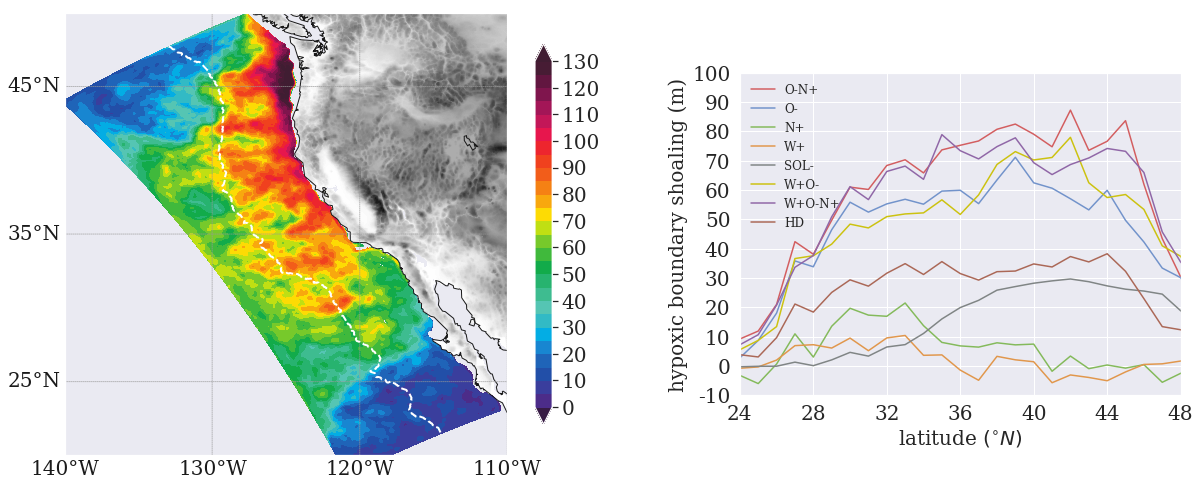

In [22]:
make_plot_shoaling_hypoxic_bdry_map(datadir)

## Figure 9: Hypoxia on the shelf

In [23]:
def make_plot_hypoxic_area_pctage_shelf(datadir):
    ''' hypoxia on the shelf '''
    # data file needed
    file_hypfrac_ref     = 'hypoxic_pctage_CCS1-RD.NVOcobalt31S_1996-2006.nc'
    file_hypfrac_pertON  = 'hypoxic_pctage_CCS1-RD.FCcobalt32R_1996-2006.nc'
    file_hypfrac_pertO   = 'hypoxic_pctage_CCS1-RD.FCcobalt33O_1996-2006.nc'
    file_hypfrac_pertN   = 'hypoxic_pctage_CCS1-RD.FCcobalt34N_1996-2006.nc'
    file_hypfrac_pertW   = 'hypoxic_pctage_CCS1-RD.FCcobalt35W_1996-2006.nc'
    file_hypfrac_pertSOL = 'hypoxic_pctage_Tpert_CCS1-RD.NVOcobalt31S_1996-2006.nc'
    file_hypfrac_pertWO  = 'hypoxic_pctage_CCS1-RD.FCcobalt37WO_1996-2006.nc'
    file_hypfrac_pertWON = 'hypoxic_pctage_CCS1-RD.FCcobalt38WON_1996-2006.nc'
    file_hypfrac_pertHD = 'hypoxic_pctage_CCS1-RD.FCcobalt39HD_1996-2006.nc'
    
    # percentage of shelf hypoxic
    clim_o2_31S = readnc(datadir + file_hypfrac_ref,     'hypoxic_pctage_shelf')
    clim_o2_32R = readnc(datadir + file_hypfrac_pertON,  'hypoxic_pctage_shelf')
    clim_o2_33O = readnc(datadir + file_hypfrac_pertO,   'hypoxic_pctage_shelf')
    clim_o2_34N = readnc(datadir + file_hypfrac_pertN,   'hypoxic_pctage_shelf')
    clim_o2_35W = readnc(datadir + file_hypfrac_pertW,   'hypoxic_pctage_shelf')
    clim_o2_SOL = readnc(datadir + file_hypfrac_pertSOL, 'hypoxic_pctage_shelf')
    clim_o2_37WO= readnc(datadir + file_hypfrac_pertWO,  'hypoxic_pctage_shelf')
    clim_o2_38WON= readnc(datadir + file_hypfrac_pertWON,  'hypoxic_pctage_shelf')
    clim_o2_39HD= readnc(datadir + file_hypfrac_pertHD,  'hypoxic_pctage_shelf')
    
    time = 2 * np.arange(1,13)

    pc_tot = clim_o2_32R - clim_o2_31S
    pc_o2  = clim_o2_33O - clim_o2_31S
    pc_n   = clim_o2_34N - clim_o2_31S
    pc_w   = clim_o2_35W - clim_o2_31S
    pc_sol = clim_o2_SOL - clim_o2_31S
    pc_wo  = clim_o2_37WO- clim_o2_31S
    pc_won  = clim_o2_38WON- clim_o2_31S
    pc_hd  = clim_o2_39HD- clim_o2_31S

    fig = plt.figure(figsize=[12,10])
    bar_width=0.25
    my_yticks = np.arange(40,100+10,10)

    sns.set_style("darkgrid", {
    "font.family": "serif",
    "font.serif": ["Times", "Palatino", "serif"],
    'grid.linestyle': '-'
    })

    my_colors = define_colors()

    plt.bar(time+1.5*bar_width, pc_o2, bar_width, 
            color=my_colors['my_blue_bar'],
            bottom=clim_o2_31S, label='O-')
    plt.bar(time+1.5*bar_width, pc_n, bar_width, 
            color=my_colors['my_green_bar'],
            bottom=clim_o2_31S+pc_o2, label='N+')
    plt.bar(time+2.5*bar_width, pc_tot, bar_width, 
            color=my_colors['my_red_bar'],
            bottom=clim_o2_31S, label='O-N+')
    plt.bar(time-0.5*bar_width, pc_w,bar_width, 
            color=my_colors['my_orange_bar'],
            bottom=clim_o2_31S, label='W+')
    plt.bar(time+0.5*bar_width, pc_sol, bar_width, 
            color=my_colors['my_grey_bar'],
            bottom=clim_o2_31S, label='SOL-')
    plt.bar(time+3.5*bar_width, pc_wo, bar_width, 
            color=my_colors['my_yellow_bar'],
            bottom=clim_o2_31S, label='W+O-')
    plt.bar(time+4.5*bar_width, pc_won, bar_width, 
            color=my_colors['my_violet_bar'],
            bottom=clim_o2_31S, label='W+O-N+')
    plt.bar(time+5.5*bar_width, pc_hd, bar_width, 
            color=my_colors['my_darkred_bar'],
            bottom=clim_o2_31S, label='HD')

    
    plt.plot(time + 3.5*bar_width, clim_o2_31S, 
             color=my_colors['my_violet'], marker='o',
             linestyle='--', label='REF')
    
    plt.legend(loc=2, frameon=True, fontsize=16)
    plt.xticks(time + 3.5*bar_width, months, 
               rotation=45, fontsize=20)
    plt.xlim([1,26])
    plt.ylabel('Hypoxic fraction of shelf area (%)', 
               fontsize=20)
    plt.ylim([40.,105.])
    plt.yticks(my_yticks, my_yticks, fontsize=20)
    
    if save_png:
        plt.savefig('figure9.png', bbox_inches='tight')
    if save_eps:
        plt.savefig('figure9.eps', bbox_inches='tight')

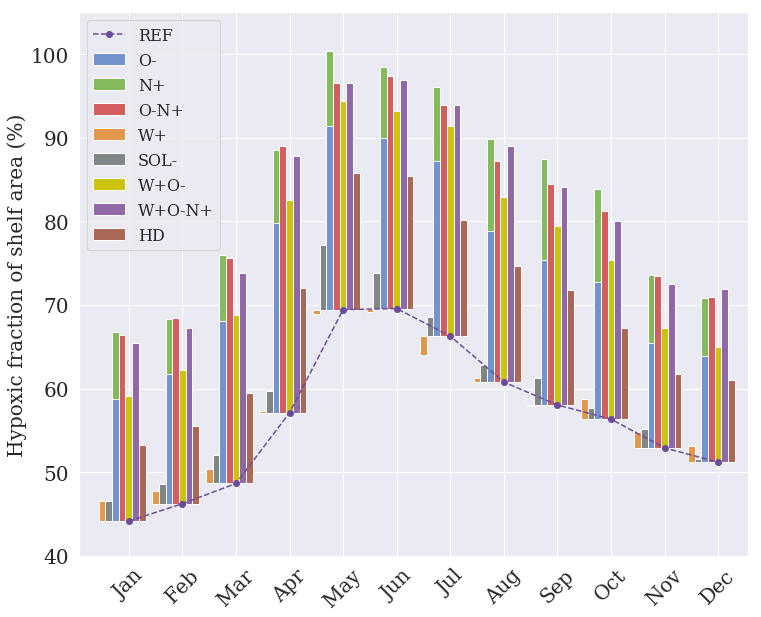

In [24]:
make_plot_hypoxic_area_pctage_shelf(datadir)

## The End